In [2]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 281.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 268.3 kB/s eta 0:00:00
  Obtaining dependency information for j


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import *

In [66]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [3]:
y.head()

,0
0,63.320498
1,-23.426394
2,11.982771
3,-102.883304
4,-49.373475


# парная регрессия

In [4]:
binary = LinearRegression()
binary.fit(x[[1]], y)

LinearRegression()

In [5]:
print(binary.coef_)
binary.predict(x[[1]])

[[95.52010745]]


array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

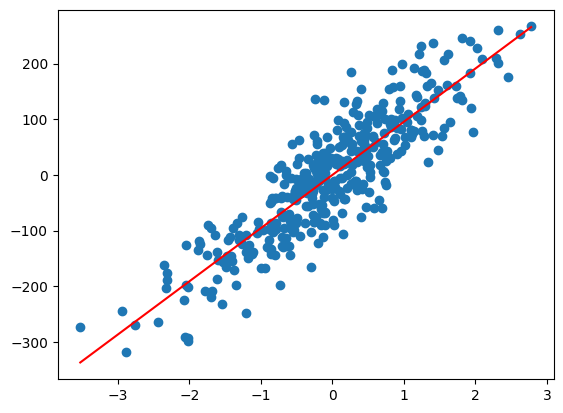

In [6]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [7]:
binary.score(x[[1]], y)

0.7699743283650629

# множественная регрессия

In [8]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

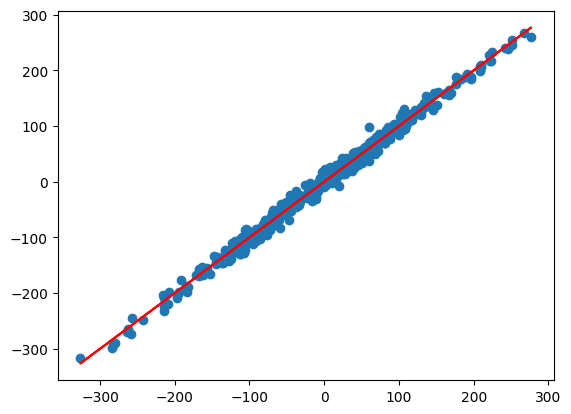

In [9]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

# 1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

[[22.78111342]] 0
[[95.52010745]] 1
[[46.94897635]] 2
[[23.99882407]] 3
[[1.49082042]] 4


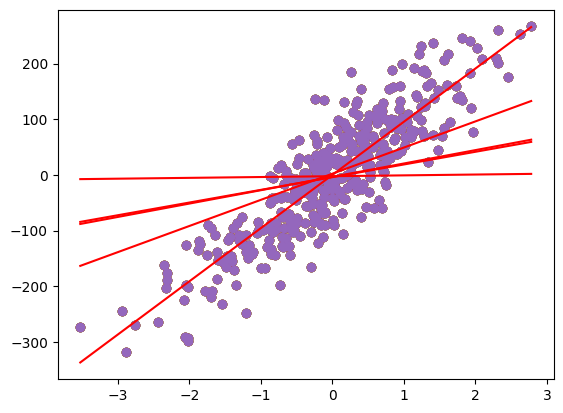

In [10]:
for i in range(5):
    binary = LinearRegression()
    binary.fit(x[[i]], y)
    xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
    plt.plot(xx, binary.predict(xx), c='r')
    plt.scatter(x[1], y)
    print(binary.coef_,i)

# 2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [16]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, n):
        self.betas = np.array([0] * n)

    def predict(self, X):
        return np.dot(X, self.betas.T)
    
    def error(self, X, Y):
        return (np.linalg.norm(self.predict(X)[:, None] - Y)**2) / len(Y)
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=10_000):
        steps, errors = [], []
        step = 0        
        for _ in range(max_steps):
            self.betas = self.betas - alpha * ((2 * np.dot(X.T, np.dot(X,self.betas.T)[:, None] - Y) / len(Y)).T)[0]
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

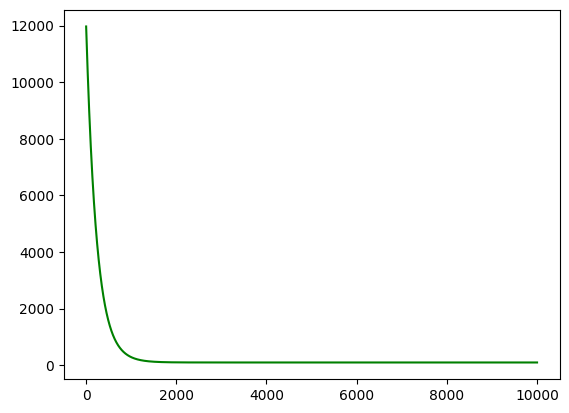

In [67]:
x['b0'] = np.array([1] * x.shape[0])
x = x.astype('float64')

lin_regr = Model(x.shape[1])
steps, errors = lin_regr.fit(x, y)

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# 3 Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии

In [156]:
pf = PolynomialFeatures(degree=2)  

X_poly_20=pf.fit_transform(np.array(x[0]).reshape(-1,1))
X_poly_21=pf.fit_transform(np.array(x[1]).reshape(-1,1))
X_poly_22=pf.fit_transform(np.array(x[2]).reshape(-1,1))
X_poly_23=pf.fit_transform(np.array(x[3]).reshape(-1,1))
X_poly_24=pf.fit_transform(np.array(x[4]).reshape(-1,1))

model_20=LinearRegression()
model_20.fit(X_poly_20,y)
model_21=LinearRegression()
model_21.fit(X_poly_21,y)
model_22=LinearRegression()
model_22.fit(X_poly_22,y)
model_23=LinearRegression()
model_23.fit(X_poly_23,y)
model_24=LinearRegression()
model_24.fit(X_poly_24,y)
model_20.score(X_poly_20,y),model_21.score(X_poly_21,y),model_22.score(X_poly_22,y),model_23.score(X_poly_23,y),model_24.score(X_poly_24,y)


(0.04367170367915507,
 0.7699942588883133,
 0.19000787278473819,
 0.04794250960519941,
 0.0010490365524417067)

In [157]:
pf = PolynomialFeatures(degree=3)  

X_poly_30=pf.fit_transform(np.array(x[0]).reshape(-1,1))
X_poly_31=pf.fit_transform(np.array(x[1]).reshape(-1,1))
X_poly_32=pf.fit_transform(np.array(x[2]).reshape(-1,1))
X_poly_33=pf.fit_transform(np.array(x[3]).reshape(-1,1))
X_poly_34=pf.fit_transform(np.array(x[4]).reshape(-1,1))

model_30=LinearRegression()
model_30.fit(X_poly_30,y)
model_31=LinearRegression()
model_31.fit(X_poly_31,y)
model_32=LinearRegression()
model_32.fit(X_poly_32,y)
model_33=LinearRegression()
model_33.fit(X_poly_33,y)
model_34=LinearRegression()
model_34.fit(X_poly_34,y)
model_30.score(X_poly_30,y),model_31.score(X_poly_31,y),model_32.score(X_poly_32,y),model_33.score(X_poly_33,y),model_34.score(X_poly_34,y)


(0.04376506816920167,
 0.7711184109235001,
 0.19280163734543854,
 0.05031163217811918,
 0.0010646025332345932)

In [158]:
pf = PolynomialFeatures(degree=10)  

X_poly_100=pf.fit_transform(np.array(x[0]).reshape(-1,1))
X_poly_101=pf.fit_transform(np.array(x[1]).reshape(-1,1))
X_poly_102=pf.fit_transform(np.array(x[2]).reshape(-1,1))
X_poly_103=pf.fit_transform(np.array(x[3]).reshape(-1,1))
X_poly_104=pf.fit_transform(np.array(x[4]).reshape(-1,1))

model_100=LinearRegression()
model_100.fit(X_poly_100,y)
model_101=LinearRegression()
model_101.fit(X_poly_101,y)
model_102=LinearRegression()
model_102.fit(X_poly_102,y)
model_103=LinearRegression()
model_103.fit(X_poly_103,y)
model_104=LinearRegression()
model_104.fit(X_poly_104,y)
model_100.score(X_poly_100,y),model_101.score(X_poly_101,y),model_102.score(X_poly_102,y),model_103.score(X_poly_103,y),model_104.score(X_poly_104,y)


(0.05035596325168745,
 0.7726769307411921,
 0.2044094456126443,
 0.07266746559268988,
 0.0450526417134679)